<h1 align="center"><font color = "firebrick">Supervised ML - Simple and Multiple Regressions</h3>

Linear regression is a basic and commonly used type of predictive analysis. The overall idea of regression is to examine two things:
1. Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?
2. Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  

These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.  

The simplest form of the regression equation with one dependent and one independent variable is defined by the formula shown below:

## y = mx + c

Where x and y are variables, m is the slope or gradient of x, and c is the Y-axis intercept.

In machine learning and deep learning, the equation remains the same, but we typically use W (weights) instead of m and B (bias) instead of c:

## y = w*x + b

Why Use w and w Instead of m and c?  
w (Weights): Represents the learned relationship between input (x) and output (y) during training.  
b (Bias): Allows the model to shift predictions up or down, improving flexibility.  

How It Works in ML & DL:
* Training Phase: The model starts with random W and B values.
* Optimization: Using algorithms like Gradient Descent, the model updates W and B to minimize prediction errors.
* Inference: Once trained, the model applies W*x + B to make predictions on new data.


This formulation is widely used in linear regression, neural networks, and deep learning architectures.


Three major uses for regression analysis are:
1. determining the strength of predictors,
2. forecasting an effect, and
3. trend forecasting.

# 1. Application

As a real estate consultant or analyst, you want to understand the factors that influence a house's sale price. Based on your analysis, you aim to predict the price of a house given various details such as lot area, overall quality, year built, number of bathrooms, and other relevant features.

# 2. Importing Data

### Loading the required libraries

It is good practice to import all required libraries at the beginning of a notebook. This ensures that all code which follows will execute without errors caused by unloaded libraries.

In [ ]:
# Importing the initial required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings that may appear
import warnings
warnings.filterwarnings("ignore")

### Importing the data

In [ ]:
# Load in the data
url = "https://bit.ly/316tYZT"
df = pd.read_csv(url)
df.head()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
0,31770,6,5,1960,1960,1656,1,3,2,2,215000
1,11622,5,6,1961,1961,896,1,2,0,1,105000
2,14267,6,6,1958,1958,1329,1,3,0,1,172000
3,11160,7,5,1968,1968,2110,2,3,2,2,244000
4,13830,5,5,1997,1998,1629,2,3,1,2,189900


##### Some terminology that we use in machine learning or data science work:

**1. Table**: Table: A dataframe, dataset, or any specific name assigned to a structured collection of data.

**2. Columns**: Represent variables or parameters in the dataset.

**3. Input Columns**: Also known as input variables, predictors, independent variables, response variables, or features (in classification problems).

**4. Output Column**: Also referred to as the output variable, outcome, dependent variable, target variable, or label (in classification problems).

**5. EDA (Exploratory Data Analysis)**: The process of visually analyzing and understanding data patterns and distributions before applying models.

**6. Normalization**: The process of scaling numerical data to a common range (e.g., 0 to 1) to ensure that no single feature dominates the model’s learning process. Common methods include Min-Max Scaling and Z-score Standardization.

**7. Model**: The machine learning algorithm or program applied to the dataset to make predictions.

**8. Performance**: Evaluating how well the model makes predictions through model performance assessment.

**9. Performance Metric**: Specific calculations or functions used to quantify the model’s predictive accuracy (e.g., accuracy, precision, recall, RMSE).

**10. Hyperparameters**: Parameters that are set before training a model and determine how the model learns. Examples include the learning rate, number of hidden layers, batch size, and regularization strength.

**11. Hyperparameter Tuning**: The process of systematically adjusting hyperparameters to improve model performance. This involves testing different values and comparing results to optimize learning.



## Applications

Machine learning models are used in various real-world applications, and different types of models are suited for different tasks. Below are the key categories of machine learning problems:

### **A. Regression**
- Regression models predict continuous numerical values.
- Used when the target variable is a real number (e.g., price, temperature, salary).
- Example: Predicting house prices based on features like square footage, location, and number of bedrooms.

### **B. Classification**
- Classification models predict categorical labels or discrete values.
- Used when the target variable falls into distinct categories (e.g., spam vs. not spam, disease diagnosis).
- Example: Classifying emails as spam or not spam.

### **C. Clustering**
- Clustering models group similar data points together based on their features.
- Used when there are no predefined labels, and the goal is to discover hidden patterns in data.
- Example: Customer segmentation in marketing based on purchasing behavior.

### **D. Principal Component Analysis (PCA)**
- PCA is a dimensionality reduction technique used to transform high-dimensional data into a smaller set of uncorrelated variables.
- Helps in visualizing complex datasets and improving computational efficiency.
- Example: Reducing the number of features in an image recognition dataset while preserving essential information.

Each of these methods is suited for different tasks and can be combined for more advanced machine learning applications.


# 3. Understanding the Data

### Basic exploration


There are various methods to understand data which you have learnt in the previous course. We are going to use some of those here.

In [ ]:
# Different basic EDA steps

print("Dimension of the data:", df.shape) # returns number of rows, column

print("\n", "--" * 50, "\n") # just adds a new line and a visual separator line to make outputs readable

print("Summary of the data\n")
display(df.info()) # quick summary insights with data types and data completeness

print("\n", "--" * 50, "\n")

print("Missing values in the entire dataframe\n")
display(df.isnull().sum().sum()) # display mainly renders richer formatted outputs & flexible to render multiple outputs in single cell

print("\n", "--" * 50, "\n")

print("Statistical description:")
display(df.describe()) # summary of key statistics


Dimension of the data: (2925, 11)

 ---------------------------------------------------------------------------------------------------- 

Summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Lot Area        2925 non-null   int64
 1   Overall Qual    2925 non-null   int64
 2   Overall Cond    2925 non-null   int64
 3   Year Built      2925 non-null   int64
 4   Year Remod/Add  2925 non-null   int64
 5   Gr Liv Area     2925 non-null   int64
 6   Full Bath       2925 non-null   int64
 7   Bedroom AbvGr   2925 non-null   int64
 8   Fireplaces      2925 non-null   int64
 9   Garage Cars     2925 non-null   int64
 10  SalePrice       2925 non-null   int64
dtypes: int64(11)
memory usage: 251.5 KB


None


 ---------------------------------------------------------------------------------------------------- 

Missing values in the entire dataframe



0


 ---------------------------------------------------------------------------------------------------- 

Statistical description:


,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,10103.583590,6.088205,5.563761,1971.302906,1984.234188,1493.978803,1.564786,2.853675,0.596923,1.764444,180411.574701
std,7781.999124,1.402953,1.112262,30.242474,20.861774,486.273646,0.551386,0.827737,0.645349,0.760405,78554.857286
min,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,0.000000,0.000000,0.000000,12789.000000
25%,7438.000000,5.000000,5.000000,1954.000000,1965.000000,1126.000000,1.000000,2.000000,0.000000,1.000000,129500.000000
50%,9428.000000,6.000000,5.000000,1973.000000,1993.000000,1441.000000,2.000000,3.000000,1.000000,2.000000,160000.000000
75%,11515.000000,7.000000,6.000000,2001.000000,2004.000000,1740.000000,2.000000,3.000000,1.000000,2.000000,213500.000000
max,215245.000000,10.000000,9.000000,2010.000000,2010.000000,3820.000000,4.000000,8.000000,4.000000,5.000000,625000.000000


#### Observations from basic exploration:
1. There are a total of 2925 records/rows and 11 features/columns in the dataset.
2. All columns contain `integer` values. We can use all columns (if required) for regression analysis as all are numeric.
3. There is no missing value in any row/column. Hence, there is no need to treat the missing values.
4. Descriptive statistics can be interpreted for each column. Have a look at these and discuss them!

### Correlation analysis


In [ ]:
# Correlation matrix
df.corr()

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
Lot Area,1.000000,0.083256,-0.032795,0.017049,0.015887,0.258529,0.121394,0.138169,0.247698,0.176047,0.270047
Overall Qual,0.083256,1.000000,-0.093902,0.596621,0.569498,0.564797,0.518713,0.061772,0.387174,0.598127,0.805236
Overall Cond,-0.032795,-0.093902,1.000000,-0.368533,0.048356,-0.116169,-0.214322,-0.006207,-0.030648,-0.181384,-0.103296
Year Built,0.017049,0.596621,-0.368533,1.000000,0.611444,0.239305,0.468485,-0.055650,0.167803,0.537146,0.565110
Year Remod/Add,0.015887,0.569498,0.048356,0.611444,1.000000,0.318860,0.456708,-0.021801,0.130699,0.423511,0.540290
Gr Liv Area,0.258529,0.564797,-0.116169,0.239305,0.318860,1.000000,0.637511,0.534222,0.449018,0.493222,0.719463
Full Bath,0.121394,0.518713,-0.214322,0.468485,0.456708,0.637511,1.000000,0.358727,0.225748,0.474841,0.544486
Bedroom AbvGr,0.138169,0.061772,-0.006207,-0.055650,-0.021801,0.534222,0.358727,1.000000,0.075856,0.090296,0.139766
Fireplaces,0.247698,0.387174,-0.030648,0.167803,0.130699,0.449018,0.225748,0.075856,1.000000,0.319385,0.474878
Garage Cars,0.176047,0.598127,-0.181384,0.537146,0.423511,0.493222,0.474841,0.090296,0.319385,1.000000,0.652227


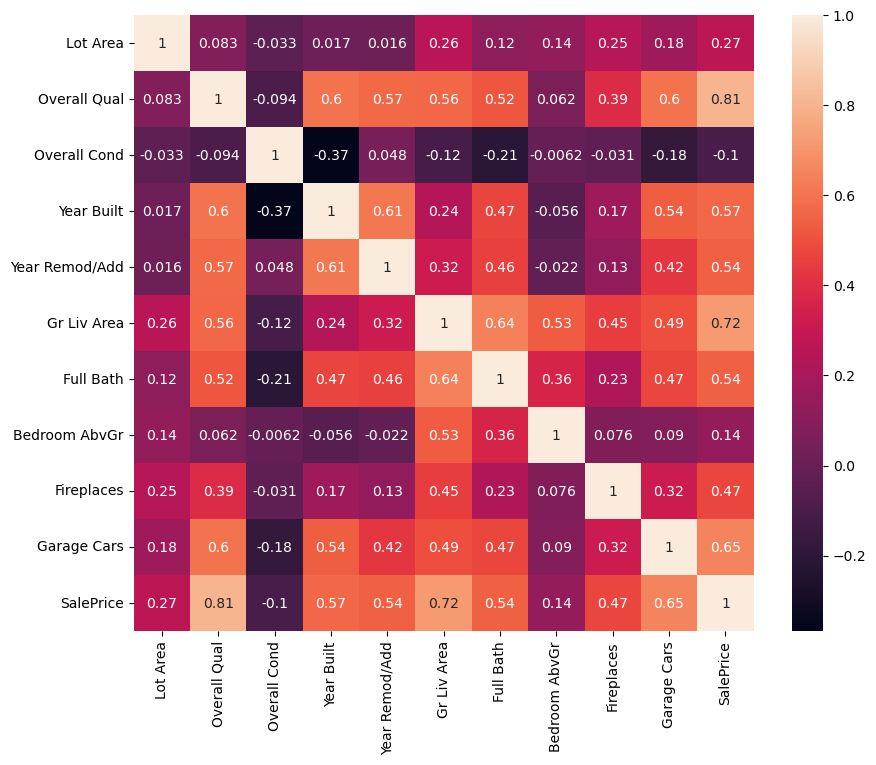

In [ ]:
# Let's plot the correlation matrix as a heatmap

plt.figure(figsize = (10,8)) # set figure size
sns.heatmap(df.corr(), annot = True); # plot heatmap for field correlations with annotation

Since there are many columns, let's just arrange the correlation matrix in a way that we see the correaltion values from highest to smallest.

Please note that the heatmap actually contains duplicate values i.e. the value on left diagonal are same as the value on right diagnonal. Hence, we will not include the duplicates from our next output.

Sometimes, you may want to see the output in matrix form while fitlering the correlations which are **not significant**.

In the code cell below, we are trying to filter or see only those correlation which are more than 0.5 (positive and negative, both), and not perfectly correlated (1.0) where the columns  are being compared to themselves.

We can also visualize this matrix as a heatmap as below

,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars,SalePrice
Lot Area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Overall Qual,NaN,NaN,NaN,0.596621,0.569498,0.564797,0.518713,NaN,NaN,0.598127,0.805236
Overall Cond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year Built,NaN,0.596621,NaN,NaN,0.611444,NaN,NaN,NaN,NaN,0.537146,0.565110
Year Remod/Add,NaN,0.569498,NaN,0.611444,NaN,NaN,NaN,NaN,NaN,NaN,0.540290
Gr Liv Area,NaN,0.564797,NaN,NaN,NaN,NaN,0.637511,0.534222,NaN,NaN,0.719463
Full Bath,NaN,0.518713,NaN,NaN,NaN,0.637511,NaN,NaN,NaN,NaN,0.544486
Bedroom AbvGr,NaN,NaN,NaN,NaN,NaN,0.534222,NaN,NaN,NaN,NaN,NaN
Fireplaces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Garage Cars,NaN,0.598127,NaN,0.537146,NaN,NaN,NaN,NaN,NaN,NaN,0.652227


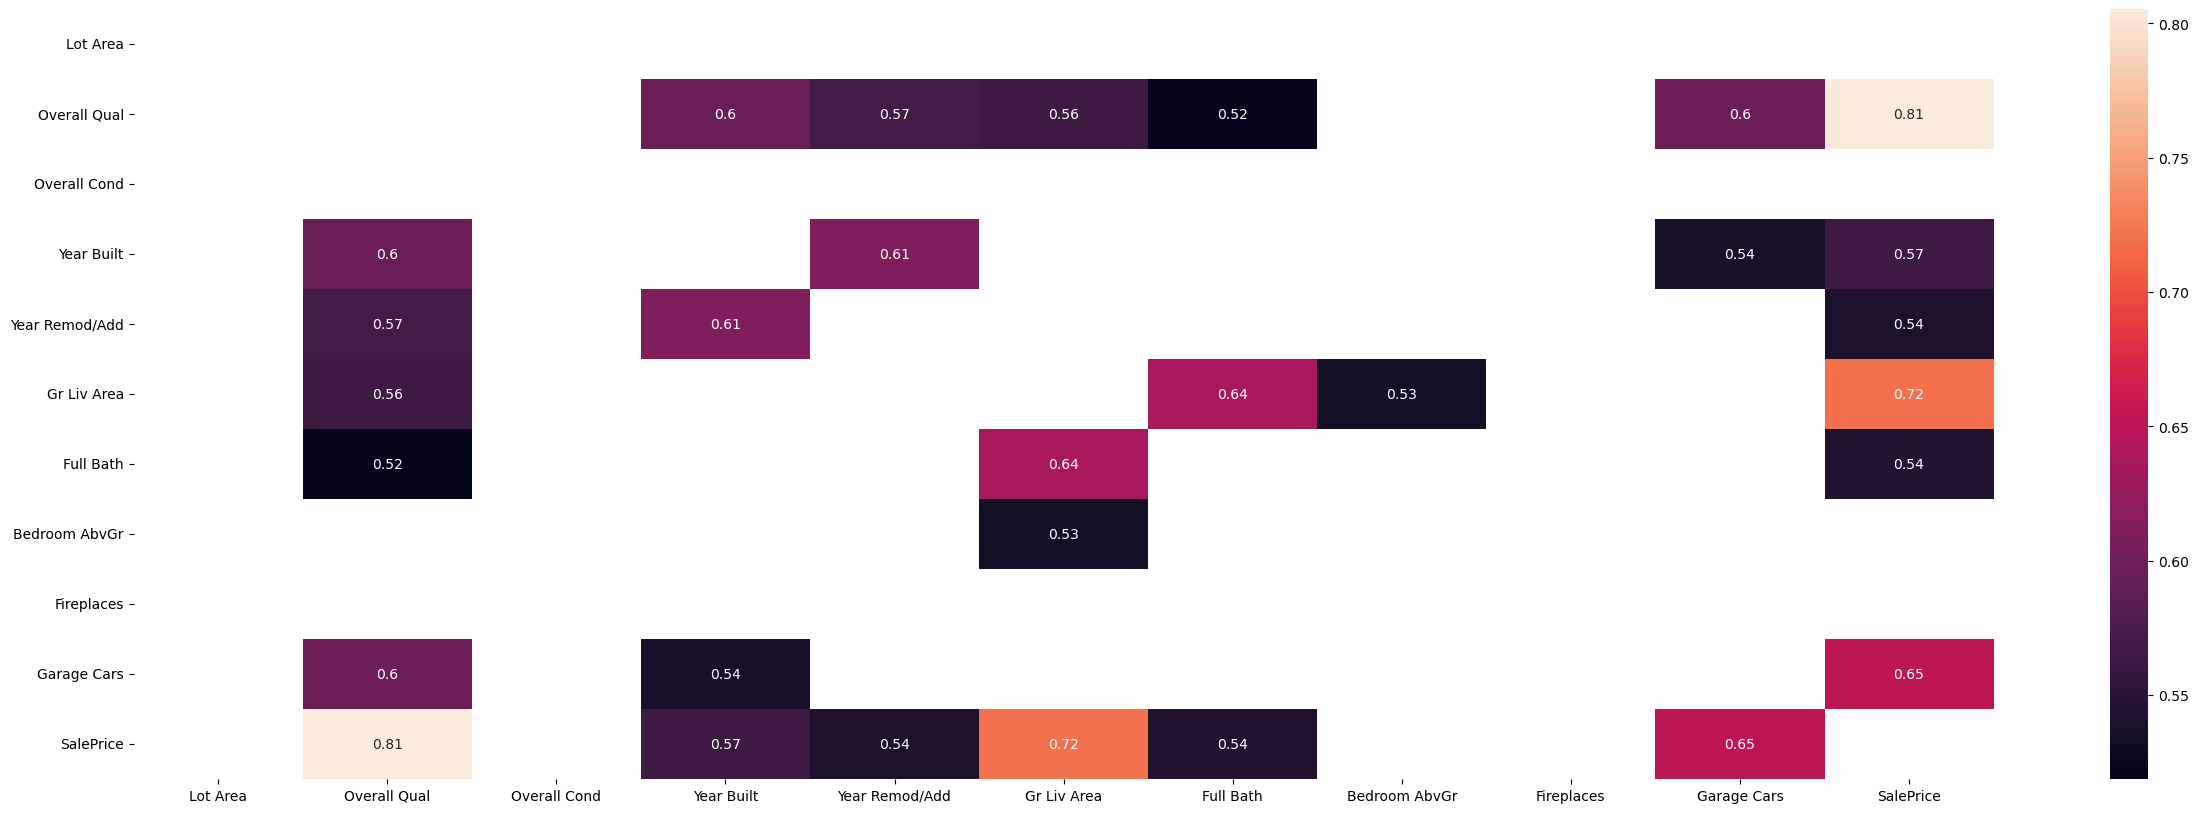

In [ ]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr > 0.5) | (dfCorr < -0.5)) & (dfCorr !=1.000)]
display(filteredDf)

plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True)
plt.show()

#### Overall observations from correlation analysis:
1. `SalePrice` is strongly positive correlated to `Overall Qual`
2. `SalePrice` is highly positive correlated to `Gr Liv Area` which refers to Ground Living Area, and `Garage Cars` which refers to car capacity in the garage.
3. There is medium correlation with `Year Built`, `Year Remod/Add`and `Full Bath`.

##### <font color = "red">How are we going to use this observation in our analysis?
    
- For Simple Linear Regression, we will use `Overall Qual` column.
- For Multiple Linear Regression, we will use all columns of the dataframe.
- For additional practice, you can rework on the Multiple Linear Regression taking only those columns which are mentioned in the observations above i.e. where the correlation is more than 0.5

There are many other possible explorations that can be performed on this dataset, depending on the specific needs. For example, if we identify missing values in the dataframe, we can analyze them column-wise and take appropriate steps to remove or replace them. In the previous course, you learned various methods to visualize columns using customized code.

### Visual analysis (EDA - Exploratory Data Analysis)

We have already visually observed the correlation between the features. There are many other visual explorations which can be done.

Here, as we have a numeric Target column, a suitable visualization might be a histogram. Additionally, we can use:

* Box plots to detect outliers and analyze value distributions.
* Scatter plots to observe relationships between numerical features and the target variable.
* Pair plots to visualize pairwise relationships between multiple numerical features.
* Heatmaps to identify strong correlations between different variables.

These visualizations provide deeper insights into the dataset, helping in feature selection and preprocessing.









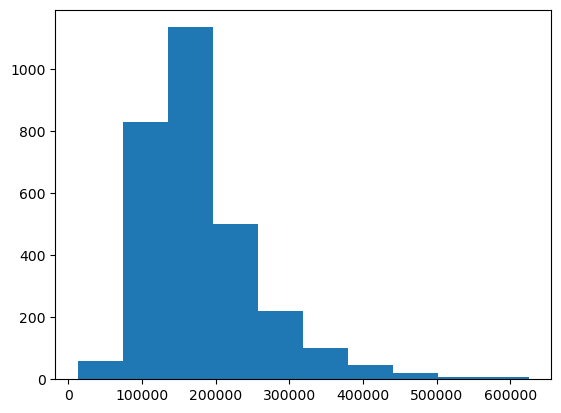

In [ ]:
plt.hist(df['SalePrice'])
plt.show()

#### Overall observations from EDA:
Since our `target variables` is `SalePrice`, we will focus only on it:
1. The SalePrice is a little positive skewed. There are some sales prices which are on higher side compared to other values.
2. We will still consider SalesPrice as having normal distribution as its skewness is within the acceptable range of -2 ot +2.  <br>Refer: https://imaging.mrc-cbu.cam.ac.uk/statswiki/FAQ/Simon?action=AttachFile&do=view&target=rulesofthumb.pdf
<br> Please note that different researchers may have different acceptable range for skewness. It all depends on what level of accuracy they need and how much resources they have to further clean the data to make it look normally distributed.
3. SalePrice has higher correlation with some of the columns which we have explored earlier in correlation analsysis.

If we were instead dealing with a categorical column, suitable visualizations might include:

* Bar charts to display the frequency distribution of different categories.
* Pie charts to represent the proportion of each category within the dataset.
* Count plots to compare category distributions in different feature subsets.
* Stacked bar charts to visualize the relationship between categorical features and the target variable.
* Box plots (for numerical features grouped by category) to observe differences in distribution across categories.

These visualizations help in understanding class imbalances, feature importance, and relationships between categorical variables and other features in the dataset.

# 4. Data Preparation

Data preparation is also called data cleaning, data transformation, data wrangling etc.

### Data Cleaning

Missing, incomplete or incorrect data can cause many issues and will negatively impact our data analysis and predictive modelling. This "dirty" data should definitely be taken care of.

![image.png](attachment:image.png)


In our dataset, we do not have these issues. Later, while working on some other datasets, we will take care of these problems, if found.

### Feature Selection

We have quite a few features/columns in our data. We will select for modelling only those columns which are best suited to the analysis, e.g. for high correlation with the target feature. This method is called feature selection.

The feature selection will depend on the type of regression analysis we are going to do. For simple linear regression which only uses one X or independent variable, one might simply select the highest-correlated to the target column. For multiple linear regression, a cutoff correlation value could be selected then all equal or higher correlated features could be used for the model.

# 5. Simple Linear Regression

### Objective and working of Simple Linear Regression

In Simple Linear Regression, we predict a dependent variable based on the values in an independent variable.

## Y = wx + b

- Y = Our **target/output/dependent variable** which will be **`SalesPrice`** which are going to predict.<br>
- X = Our **predictor/input/independent variable** which will be **`Overall Qual`** which has the highest correlation with SalesPrice.
- b = Constant value or y-intercept
- w = slope or coefficient of X

**Understanding the equation with regression line**

### Feature selection for Simple Linear Regression

In [ ]:
X = df[['Overall Qual']]  # Taking only one column as input variable
y = df[['SalePrice']]     # We want to predict sales based on Overall Qual of the house.

# Two brackets given to put the data in dataframe format.
# If do not want to input as dataframe format then need to reshape the data,
# which we will do later.
# With single bracket, it will be Series format.

# Please note that we do not need to convert y to dataframe for the modelling.
# It can work as a Series too however, to calculate the accuracy score later,
# we need it to be of same data type as of X.

In [ ]:
# Please note that the data type of x and y are dataframe.
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## **Applying `train_test_split` to Training and Testing Data**

### **Steps for Splitting and Evaluating a Model**
1. **Split the dataset** by selecting **Y** (target/label) and **X** (independent features).  
   This will yield **four parts**:  
   - <span style="color:blue">`X_train`</span> → **Training features**  
   - <span style="color:blue">`y_train`</span> → **Training labels**  
   - <span style="color:green">`X_test`</span> → **Testing features**  
   - <span style="color:green">`y_test`</span> → **Testing labels**  

2. **Train the model** using <span style="color:blue">`X_train`</span> and <span style="color:blue">`y_train`</span>.  
3. **Make predictions** using the trained model on <span style="color:green">`X_test`</span>.  
   - The predicted values are stored in `y_pred`.  
4. **Evaluate model performance** by comparing `y_pred` (predicted values) to <span style="color:green">`y_test`</span> (ground truth).  

This process ensures that the model is trained on one subset of data and tested on another, allowing for an unbiased assessment of its performance.  

<img src = "https://i.imgur.com/qOLmXIt.png" width="650">

Read the documentation for train_test_split(): https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# Importing the function/module to randomly split the data
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Printing some rows of split data

print(X_train[0:5])
print(y_train[0:4])
print(X_test[0:4])
print(y_test[0:4])

# You will notice that your output may be different.
# Or, if you re-run the previous code for split and then run this cell
# then again the output will be different.
# This is because we have NOT used random_state while making the split.
# You can set "random_state = 0" (or some other integer) as an argument to train_test_split to reproduce the same split.

      Overall Qual
2026             5
1123             7
2180             4
1069             9
754              6
      SalePrice
2026     117000
1123     226700
2180     111000
1069     336860
      Overall Qual
558              5
2231             5
694              6
1054             8
      SalePrice
558      124100
2231     150909
694      103500
1054     317500


### Importing the model

In [ ]:
# importing the model

from sklearn.linear_model import LinearRegression # Algorithm or blueprint

## **Importing vs. Instantiating a Model**

When working with machine learning models, it is important to distinguish between **importing** a model (as we have done above) and **instantiating** a model (as we will do below).  

- **Importing a model** means bringing in a pre-defined blueprint from a library (such as `sklearn`, `tensorflow`, or `pytorch`).  
- **Instantiating a model** means creating an instance of that blueprint so it can be used for training and predictions.  


## **What Does It Mean to Instantiate a Model?**

Instantiating a model means creating an instance of a machine learning model from its defined structure, just like following a **blueprint** to build a car.  

### **Analogy: Car Manufacturing and Model Instantiation**
Imagine a car company designing a new car model. The engineers create a **detailed blueprint** that specifies every component—engine type, body structure, seating arrangement, and technology features. However, this blueprint itself is **not a car**—it is just a **design that defines how a car should be built**.  

Once the blueprint is finalized, the **factory can produce many physical cars** based on that same design. Each individual car is a unique **instance** of the original blueprint, but they all follow the same core structure.  

Similarly, in machine learning:  
- **The model definition (blueprint)** outlines the architecture, such as the type of model (e.g., linear regression, decision tree), number of layers, and the relationships between inputs and outputs.  
- **Instantiating the model** creates a specific instance of this blueprint, allowing it to accept data and perform training or inference.  
- **Multiple models can be instantiated** from the same blueprint with different data or parameter settings, just like a factory can produce multiple cars of the same type but with different colors or configurations.  

### **Example in Code**
In Python, when we define a model, we are **not yet creating an actual, usable model**—we are just prepping a blueprint. Instantiating the model is like actually producing a car, and yields a model ready for training and predictions.  

For example, here’s how to instantiate a **Simple Linear Regression (SLR) model** called “slr_model":  



In [ ]:
# instantiating the model

slr_model = LinearRegression()

## Training the model

In [ ]:
# fit() is used to pass training data to train the model

slr_model.fit(X_train, y_train)

LinearRegression()

### Model Prediction

Now that the model has been trained on the training dataset (both input and output), we now have a trained model!

What does our trained model do? It does what it was trained to do. We fed it X (the column Overall Quality) and y (the target column Sale Price) across 80% of all the rows of data in the dataset. Now, we can feed it a hypothetical X, that is, an Overall Quality value for some new house, and it will **infer** or **predict** what the Sale Price for that new house *should be according to its training*.

We will now predict the y values for some testing input (X_test, the 20% of Overall Quality we did not share during training). These y values the model predicts for X_test will be y_pred.

Remember, we still also have available to us y_test! y_test are the **real** values of y which correspond to X_test across those rows of the test set.

To determine the quality of our model, or how score how accurate its predictions are, we will compare the resultant predictions (y_pred) with actual output from testing data (y_test, the last remaining part of the 4 output from the train-test-split, and the real values of y corresponding to X_test).

In [ ]:
# Predicting the values for testing inputs

y_pred = slr_model.predict(X_test)

Let's compare the actual y (y_test) and predicted y (y_pred).

In [ ]:
display(y_test[0:10])
display(y_pred[0:10])

# We can clearly see there is some +ve or -ve difference between the actual and predicted.

,SalePrice
558,124100
2231,150909
694,103500
1054,317500
1892,200000
52,160000
2355,116050
8,236500
22,216000
1177,345000


array([[132044.62700706],
       [132044.62700706],
       [176332.37652537],
       [264907.87556198],
       [176332.37652537],
       [220620.12604367],
       [ 87756.87748876],
       [264907.87556198],
       [220620.12604367],
       [353483.37459859]])

We can also use any new value as input to predict the price.

In [ ]:
# Predicting price for overall quality = 7

newQuality = 7

# The model takes inputs as array of values hence, we will convert the input to an array format

newInput = np.array(newQuality).reshape(-1, 1)  # reshape(-1, 1) means unknown number of rows and 1 column

# Predicting the price for the given input
slr_model.predict(newInput)

array([[220620.12604367]])

### Model Evaluation

It's always good to evaluate the model's performance. For Linear Regression models, the performance metrics can be many, namely:
1. Mean Squared Error
2. Mean Absolute Error
3. Root MSE
4. Accuracy score

.. and many more. We will look into the commonly used MSE and Accuracy scores.

In [ ]:
# mterics from sklearn contains all the performance evaluation metrics

from sklearn import metrics

##### Average error

In [ ]:
# Finding mean absolute error
metrics.mean_absolute_error(y_test, y_pred)

33759.9136101642

It indicates that on an average, if the model predicts a price of a house based on overall quality, there may be an error of the value that appears above.

##### Model's accuracy

In [ ]:
accuracy_slr = metrics.r2_score(y_test, y_pred)

print("Accuracy of the model is:", round(accuracy_slr*100), "%")

Accuracy of the model is: 65 %


### **Model Usability vs. Accuracy**  

The trained model is **usable** for making predictions, but its accuracy is inconsistent. While it can estimate house prices based on overall quality, the differences between predicted and actual values show noticeable errors.  

### **Key Observations:**  

1. **Some predictions are relatively close** – In certain cases, the model's estimates are only off by a small margin, indicating that it has learned some patterns in the data.  

2. **Significant errors occur** – Some predictions differ greatly from actual values, either **overestimating** or **underestimating** house prices by a wide margin. This suggests the model struggles with certain price ranges or property types.  

3. **Inconsistent generalization** – The model does not always predict higher or lower than the actual price; it fluctuates. This inconsistency suggests that while it captures some relationships in the data, it lacks strong predictive power across all cases.  

### **Conclusion**  
The model provides a general estimate of house prices but is not highly accurate. Improvements such as incorporating more features, fine-tuning hyperparameters, or using a more advanced model may be necessary to achieve better predictive performance.

**Are you satisfied with the accuracy score of the model?**

So although we have developed a model to do prediction of price based on overall quality of the house, it appears that the predicted may not be good.

This is because there may be many other factors which affect the price of a house. Example, all those column which had high correlation with price.

To build a better model, we will later use the same dataset to perform **Multiple Linear Regression** where we will take other columns as well into consideration.

## Visualizing the Simple Linear Regression

Having trained the model we can now plot the resultant line of best fit according to the form of our equation

### y = wx + b

In [ ]:
# printing y intercept - 'a' in the above image

slr_model.intercept_

array([-89394.12058446])

In [ ]:
# printing slope of dependent variable - 'b' in the above image

slr_model.coef_

array([[44287.7495183]])

<font color = "red"> You already had the error value. Now you have the y-intercept and the slope of X as well. Can you write an equation based on equation </br> **Y = intercept + slope(X) + Error** ?

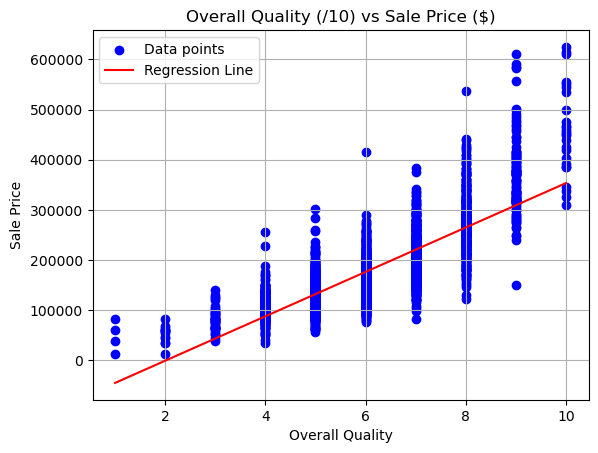

In [ ]:
# Scatter plot of the data
plt.scatter(df['Overall Qual'], df['SalePrice'], color='blue', label='Data points')

# Calculate the regression line values
slope = slr_model.coef_[0]
intercept = slr_model.intercept_
x_values = np.array([df['Overall Qual'].min(), df['Overall Qual'].max()]) # define endpoints of regression line
y_values = slope * x_values + intercept

# Overlay the regression line
plt.plot(x_values, y_values, color='red', label='Regression Line') # draw a straight line connecting two endpoints

# Labelling the plot
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Overall Quality (/10) vs Sale Price ($)')
plt.grid()
plt.legend()

plt.show()

## Comments on the graph

Notice how wide the range in price is for each of the fixed values for “Overall Quality”. No simple straight line could ever capture such a wide spread of figures accurately, and this goes a long way to explaining the results we received.

# 6. Multiple Linear Regression

### Objective and working of Multiple Linear Regression

In Multiple Linear Regression, we predict a dependent variable based on the values in multiple independent variable.

### y = w1x1 + w2x2 + ... + wixi + b


- Y = Our **target/output/dependent variable** which will be **`SalesPrice`** which are going to predict.<br>
- Xs = **predictor/input/independent variables**. For our model building, we will take all variables of the dataframe.
- b = Constant value or y-intercept
- ws = slopes or coefficients of Xs. Please note that the slope of different inputs (Xs) may be different.


**Understanding the equation with regression line**

Interpreting the gression plane or line of a multiple linear regression is difficult as our as our laptop screen will show 2D images. However, the below gif can help you visualize how the plane appears for a multiple linear regression which contains 3 input variables.

<img src="https://mediaproduction.adelaide.edu.au/public-assets/futurelearn/Data%20Analytics%20for%20Managers/Week%201%20-%20GIF/PS-3D-Representation-(1).gif" width="500">



### Feature selection for Multiple Linear Regression

In [ ]:
X = df.drop('SalePrice', axis=1) # Drop the saleprice - everything else is the input
y = df[['SalePrice']] # output

In [ ]:
# Please note that the data type of x and y will be dataframe.
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### Train-Test Split

In [ ]:
# Importing the function/module to randomly split the data
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Printing some rows of split data
display(X_train[0:5])
display(y_train[0:4])
display(X_test[0:4])
display(y_test[0:4])



,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars
650,10615,3,5,1900,1970,1699,2,3,0,2
715,8100,5,5,1898,1965,2138,2,2,0,2
1484,4438,6,5,2004,2004,848,1,1,1,2
1943,10134,5,6,1940,1950,1034,1,2,0,1
982,9101,5,6,1978,1978,1110,1,1,1,2


,SalePrice
650,95000
715,106000
1484,144500
1943,109000


,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Gr Liv Area,Full Bath,Bedroom AbvGr,Fireplaces,Garage Cars
839,14753,7,5,1998,1998,1463,2,3,0,2
598,9790,6,5,1967,1967,1342,2,3,1,2
1472,9135,7,5,2002,2003,1536,2,3,0,2
751,9928,7,8,1915,1994,1944,2,3,0,1


,SalePrice
839,207000
598,161500
1472,214000
751,179900


### Training the model

In [ ]:
# importing the model

# no need to re-import it as we have already done it once in this notebook

from sklearn.linear_model import LinearRegression

In [ ]:
# instantiating the model

mlr_model = LinearRegression()  # similar code, just giving a different name to the model

In [ ]:
# fit() is used to pass training data to train the model

mlr_model.fit(X_train, y_train)

LinearRegression()

### Model Prediction

In [ ]:
# Predicting the values for testing inputs

y_pred = mlr_model.predict(X_test)

In [ ]:
display(y_test[0:10])
display(y_pred[0:10])

# We can clearly see there is some +ve or -ve difference between the actual and predicted.

,SalePrice
839,207000
598,161500
1472,214000
751,179900
828,221800
1891,147000
2619,81400
808,153337
1276,127500
422,485000


array([[207115.52567547],
       [159044.0601358 ],
       [208694.5869635 ],
       [197047.86170226],
       [235854.57983879],
       [161422.84465926],
       [ 63174.59847002],
       [176043.44706382],
       [123092.89348226],
       [379364.97127292]])

We can also use any new value as input to predict the price. Taking new values for 10 input column will take time so let's just take any random row from the data.

In [ ]:
display(X.iloc[5])
newData = X.iloc[5]   # Just taking any random row for predicting.

# The  model takes inputs as array of values hence, we will conver the input
# to an array format

newInput = np.array(newData).reshape(1, -1)  # reshape(-1, 1) means unknown number of rows and 1 column

# Predicting the price for the given input
prediction = mlr_model.predict(newInput)

print("The predicted Sale Price for the given 10 inputs is: ", prediction)

Lot Area          9978
Overall Qual         6
Overall Cond         6
Year Built        1998
Year Remod/Add    1998
Gr Liv Area       1604
Full Bath            2
Bedroom AbvGr        3
Fireplaces           1
Garage Cars          2
Name: 5, dtype: int64

The predicted Sale Price for the given 10 inputs is:  [[204131.97729886]]


### Model Evaluation

It's always good to evaluate the model's performance. For Linear Regression models, the performance metrics can be many, namely:
1. Mean Squared Error
2. Mean Absolute Error
3. Root MSE
4. Accuracy score

.. and many more. We will look into the commonly used MSE and Accuracy scores.

In [ ]:
# mterics from sklearn contains all the performance evaluation metrics

from sklearn import metrics

##### Average error

In [ ]:
# Finding mean absolute error
metrics.mean_absolute_error(y_test, y_pred)

22688.04214920726

It indicates that on an average, if the model predicts a price of a house based on overall quality, there may be an error of the value that appears above.

##### Model's accuracy

In [ ]:
accuracy_mlr = metrics.r2_score(y_test, y_pred)

print("Accuracy of the model is:", round(accuracy_mlr*100), "%")

Accuracy of the model is: 82 %


**How does this model's accuracy compare to that of Simple Linear Regression?**

If you are still dissatisfied with the model accuracy and you want to see if it can be improved further, you can either:
1. Perform hyperparameter tuning i.e. change the default values of the model's parameters. You can get a list of such parameters here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
2. Select the column as inputs which are more correlated to the Sales Price. We should avoid columns which are highly correlated with each other.

### Result Interpretation

Remember we discussed about the components of a regression equation? We are going to create an equation using the value from the model we have developed.

<img src="https://miro.medium.com/v2/resize:fit:1160/0*UitadBJZqrH0K1VQ.png" width="500">

In [ ]:
# printing y intercept

mlr_model.intercept_

array([-1395662.88108308])

In [ ]:
# printing slope of dependent variable
mlr_model.coef_

array([[ 1.05674447e+00,  2.00176481e+04,  4.54860168e+03,
         5.06764896e+02,  1.67035238e+02,  7.94960919e+01,
        -9.97098180e+03, -1.26663901e+04,  5.91014405e+03,
         1.00598766e+04]])

In [ ]:
# Run this cell if you get scientific notations in the output of previous cell.
# And then go run the previous cell.

import numpy as np
np.set_printoptions(suppress=True)

<font color = "red"> You already had the error value. Now you have the y-intercept and the slope of X as well. Can you graph the multi the same way you did the simple linear? If yes, give the code. If not, explain why not.

In [ ]:
# Not possible. Human beings only perceive 3 dimensions and our model takes 10 different input.

# 7. Conclusion

We explored the **data science workflow**, which consists of several stages. We performed **Simple and Multiple Linear Regression** and evaluated the model using various performance metrics.  

### **Key Observations:**  
- We found that adding more **features (inputs)** to predict house prices generally improves accuracy. However, this is **not always true** in every case.  
- When too many features are included, the model can **perform poorly** because the regression equation becomes overly complex, leading to difficulties in identifying meaningful relationships.  

### **Next Steps:**  
There are many other algorithms available for **regression analysis** beyond linear regression. Feel free to explore additional datasets and models on **Kaggle** and other online resources to deepen your understanding.